| epoch 1 |  iter 1 / 148 | time 0[s] | loss 2.55
| epoch 1 |  iter 21 / 148 | time 1[s] | loss 1.28
| epoch 1 |  iter 41 / 148 | time 2[s] | loss 0.76
| epoch 1 |  iter 61 / 148 | time 3[s] | loss 0.70
| epoch 1 |  iter 81 / 148 | time 4[s] | loss 0.67
| epoch 1 |  iter 101 / 148 | time 5[s] | loss 0.66
| epoch 1 |  iter 121 / 148 | time 6[s] | loss 0.65
| epoch 1 |  iter 141 / 148 | time 7[s] | loss 0.65
Q 168+45555555
T 21355555555
☒ 66555555555
---
Q 59+744555555
T 80355555555
☒ 66555555555
---
Q 60+456555555
T 51655555555
☒ 66555555555
---
Q 178+39555555
T 21755555555
☒ 66555555555
---
Q 808+30555555
T 83855555555
☒ 66555555555
---
Q 492+19555555
T 51155555555
☒ 66555555555
---
Q 56+174555555
T 23055555555
☒ 66555555555
---
Q 988+64555555
T 10525555555
☒ 66555555555
---
Q 672+35555555
T 70755555555
☒ 66555555555
---
Q 755+30555555
T 78555555555
☒ 66555555555
---
val acc 0.063%
| epoch 2 |  iter 1 / 148 | time 0[s] | loss 0.64
| epoch 2 |  iter 21 / 148 | time 1[s] | loss 0.64
| ep

| epoch 9 |  iter 141 / 148 | time 7[s] | loss 0.32
Q 168+45555555
T 21355555555
☒ 22155555555
---
Q 59+744555555
T 80355555555
☒ 80555555555
---
Q 60+456555555
T 51655555555
☒ 52255555555
---
Q 178+39555555
T 21755555555
☒ 22555555555
---
Q 808+30555555
T 83855555555
☒ 84455555555
---
Q 492+19555555
T 51155555555
☒ 51255555555
---
Q 56+174555555
T 23055555555
☒ 23755555555
---
Q 988+64555555
T 10525555555
☑ 10525555555
---
Q 672+35555555
T 70755555555
☒ 71555555555
---
Q 755+30555555
T 78555555555
☒ 78155555555
---
val acc 6.165%
| epoch 10 |  iter 1 / 148 | time 0[s] | loss 0.31
| epoch 10 |  iter 21 / 148 | time 1[s] | loss 0.31
| epoch 10 |  iter 41 / 148 | time 2[s] | loss 0.30
| epoch 10 |  iter 61 / 148 | time 3[s] | loss 0.30
| epoch 10 |  iter 81 / 148 | time 4[s] | loss 0.30
| epoch 10 |  iter 101 / 148 | time 5[s] | loss 0.30
| epoch 10 |  iter 121 / 148 | time 6[s] | loss 0.30
| epoch 10 |  iter 141 / 148 | time 7[s] | loss 0.31
Q 168+45555555
T 21355555555
☒ 21955555555
--

val acc 13.023%
| epoch 18 |  iter 1 / 148 | time 0[s] | loss 0.22
| epoch 18 |  iter 21 / 148 | time 1[s] | loss 0.22
| epoch 18 |  iter 41 / 148 | time 2[s] | loss 0.23
| epoch 18 |  iter 61 / 148 | time 3[s] | loss 0.22
| epoch 18 |  iter 81 / 148 | time 4[s] | loss 0.23
| epoch 18 |  iter 101 / 148 | time 5[s] | loss 0.23
| epoch 18 |  iter 121 / 148 | time 6[s] | loss 0.22
| epoch 18 |  iter 141 / 148 | time 7[s] | loss 0.22
Q 168+45555555
T 21355555555
☒ 21255555555
---
Q 59+744555555
T 80355555555
☒ 80155555555
---
Q 60+456555555
T 51655555555
☒ 51855555555
---
Q 178+39555555
T 21755555555
☑ 21755555555
---
Q 808+30555555
T 83855555555
☑ 83855555555
---
Q 492+19555555
T 51155555555
☒ 50855555555
---
Q 56+174555555
T 23055555555
☒ 23155555555
---
Q 988+64555555
T 10525555555
☒ 10545555555
---
Q 672+35555555
T 70755555555
☒ 70855555555
---
Q 755+30555555
T 78555555555
☒ 78055555555
---
val acc 13.465%
| epoch 19 |  iter 1 / 148 | time 0[s] | loss 0.23
| epoch 19 |  iter 21 / 148 |

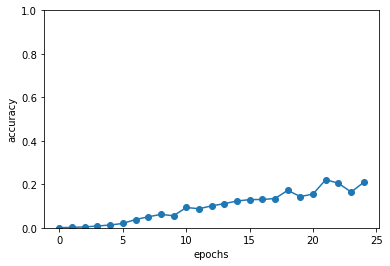

In [1]:
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
from dataset import sequence
from common.optimizer import Adam
from common.trainer import Trainer
from common.util import eval_seq2seq
from gru_seq2seq import GRUSeq2seq
from peeky_gru_seq2seq import PeekyGRUSeq2seq

# read dataset
(x_train, t_train), (x_test, t_test) = sequence.load_data('addition.txt')
char_to_id, id_to_char = sequence.get_vocab()

# reverse input? =================================================
is_reverse = False  # True
if is_reverse:
    x_train, x_test = x_train[:, ::-1], x_test[:, ::-1]
# ================================================================

# set hyperparameters
vocab_size = len(char_to_id)
wordvec_size = 16
hidden_size = 128
batch_size = 128
max_epoch = 25
max_grad = 5.0

# normal or peeky? ==============================================
# model = GRUSeq2seq(vocab_size, wordvec_size, hidden_size)
model = PeekyGRUSeq2seq(vocab_size, wordvec_size, hidden_size)
# ================================================================
optimizer = Adam()
trainer = Trainer(model, optimizer)

acc_list = []
for epoch in range(max_epoch):
    trainer.fit(x_train, t_train, max_epoch=1,
                batch_size=batch_size, max_grad=max_grad)

    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i < 10
        correct_num += eval_seq2seq(model, question, correct,
                                    id_to_char, verbose, is_reverse)

    acc = float(correct_num) / len(x_test)
    acc_list.append(acc)
    print('val acc %.3f%%' % (acc * 100))

# plot
x = np.arange(len(acc_list))
plt.plot(x, acc_list, marker='o')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(0, 1.0)
plt.show()
